In [17]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("water_potability.csv")

In [4]:
df.shape

(3276, 10)

In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.0 KB


In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(2011, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


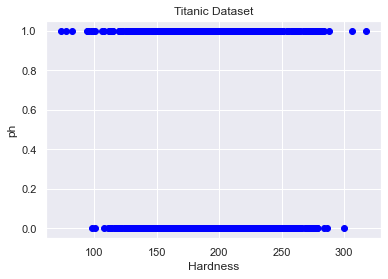

In [20]:
fig, ax = plt.subplots()

_ = ax.scatter('Hardness', 'Potability', color='blue', data=df)

_ = ax.set(xlabel='Hardness', ylabel='ph', title='Titanic Dataset')

In [101]:
X = df.iloc[:, 0:9]
y = df.iloc[:, 9]

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(1608, 9)
(403, 9)


## SVM

In [182]:
from sklearn.svm import SVC

clf = SVC()
clf = clf.fit(X_train, y_train)
svm_pred = clf.predict(X_test)

In [183]:
from sklearn.metrics import accuracy_score

Akurasi_SVM = accuracy_score(svm_pred,y_test)
print(f"Akurasi : {Akurasi_SVM}")

Akurasi : 0.630272952853598


## KNN

In [184]:
from sklearn.neighbors import KNeighborsClassifier

K = 4
model = KNeighborsClassifier(n_neighbors = K)
model = model.fit(X_train, y_train)
model

KNeighborsClassifier(n_neighbors=4)

In [185]:
knn_pred = model.predict(X_test)

In [186]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Presisi = false positif
# Recal = false negatif

Akurasi_KNN =accuracy_score(knn_pred,y_test)

print(f"Akurasi : {Akurasi_KNN}")
print(f"Precision : {precision_score(knn_pred,y_test)}")
print(f"Recall : {recall_score(knn_pred,y_test)}")
print(f"f1 : {f1_score(knn_pred,y_test)}")

Akurasi : 0.6054590570719603
Precision : 0.20134228187919462
Recall : 0.42857142857142855
f1 : 0.273972602739726


## Logistic Regression

In [187]:
from sklearn.linear_model import LogisticRegression

modellog = LogisticRegression()
modellog.fit(X_train,y_train)

LogisticRegression()

In [188]:
from sklearn.metrics import accuracy_score

logr_prediction = modellog.predict(X_test)

Akurasi_LR = accuracy_score(logr_prediction,y_test)
print(f"Akurasi : {Akurasi_LR}")

Akurasi : 0.630272952853598


## Naive Bayes

In [189]:
from sklearn.naive_bayes import GaussianNB

modelnb = GaussianNB()
modelnb.fit(X_train,y_train)

nb_pred = modelnb.predict(X_test)

In [190]:
from sklearn.metrics import accuracy_score

Akurasi_nb = accuracy_score(nb_pred,y_test)
print(f"Akurasi : {Akurasi_nb}")

Akurasi : 0.6352357320099256


## Decision Tree

In [191]:
from sklearn.tree import DecisionTreeClassifier

modeldecisiontree = DecisionTreeClassifier(max_depth=5)
modeldecisiontree.fit(X_train,y_train)

decisiontree_pred = modeldecisiontree.predict(X_test)

In [192]:
from sklearn.metrics import accuracy_score

Akurasi_dt = accuracy_score(decisiontree_pred,y_test)
print(f"Akurasi : {Akurasi_dt}")

Akurasi : 0.6352357320099256


## Random Forest

In [193]:
from sklearn.ensemble import RandomForestClassifier

modelrandomforest = RandomForestClassifier(n_estimators =100, random_state=0)
modelrandomforest.fit(X_train,y_train)

randomforest_pred = modelrandomforest.predict(X_test)

In [194]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Akurasi_rf = accuracy_score(randomforest_pred,y_test)
print(f"Akurasi : {Akurasi_rf}")
print(classification_report(randomforest_pred,y_test))

Akurasi : 0.6923076923076923
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       288
           1       0.47      0.61      0.53       115

    accuracy                           0.69       403
   macro avg       0.65      0.67      0.65       403
weighted avg       0.72      0.69      0.70       403



## Perbandingan

In [195]:
print(f"Akurasi SVM: {Akurasi_SVM}")
print(f"Akurasi KNN: {Akurasi_KNN}")
print(f"Akurasi Logistic Regression: {Akurasi_LR}")
print(f"Akurasi Naive Bayes: {Akurasi_nb}")
print(f"Akurasi Decision Tree: {Akurasi_dt}")
print(f"Akurasi Random Forest: {Akurasi_rf}")

Akurasi SVM: 0.630272952853598
Akurasi KNN: 0.6054590570719603
Akurasi Logistic Regression: 0.630272952853598
Akurasi Naive Bayes: 0.6352357320099256
Akurasi Decision Tree: 0.6352357320099256
Akurasi Random Forest: 0.6923076923076923
